### Exercice 1 – Branch and Bound pour le problème du sac à dos 0/1
On vous demande dans cet exercice de programmer un algorithme de Branch & Bound pour résoudre le
problème du sac à dos 0/1. Vous testerez d’abord votre algorithme sur les données du cours, puis sur celles
utilisées lors de la séance précédente, et vous comparerez les temps de calcul. Vous pourrez également comparer
les 3 stratégies de branchement vues en cours.

Pistes : pour mon code, je me suis appuyé sur les deux classes suivantes (rien ne vous y oblige naturellement)

Avertissement : peu de chance que vous triomphiez de ce problème sans écrire au préalable un algorithme sur
papier

In [117]:
class TreeNode:
    def __init__(self, level, V, W, taken):
        self.level = level # niveau dans l’arbre de recherche >=0
        self.V = V # valeur de la solution courante
        self.W = W # poids de la solution courante
        self.taken = taken # liste des index d’objets de la solution courante
    def __str__(self):
        return str((self.level, self.V, self.W, self.taken))
    
class KPBB:
    def __init__(self, cap, values, weights): # Initialisation des données
        self.capacity = cap
        self.values = values
        self.weights = weights
        self.unordered = [((v, w), i) for i, (v, w) in enumerate(zip(self.values, self.weights))]
        self.ordered = sorted([((v, w), i) for i, (v, w) in enumerate(zip(self.values, self.weights))], key = lambda tup: float(tup[0][0])/tup[0][1], reverse = True)
    
    def initialSolution(self): # calcul de la solution initiale
        W = self.capacity
        result = 0

        for item in self.ordered:
            if W-item[0][1] >= 0:
                result = result+item[0][0] 
                W = W-item[0][1]

        return result
    
    def UpperBound(self):
        W = self.capacity
        result = 0
        i = 0
        
        for item in self.ordered:
            if W-item[0][1] >= 0:
                result = result+item[0][0] 
                W = W-item[0][1] 
                i = i+1
            else:
                break
        
        result = result + (item[0][0]* (W/item[0][1]))

        return result

    def nodeEvaluation(self,index, node): # fonction d’évaluation d’un noeud

        return 0

    def solve(self): # algorithme de résolution
        i = 0
        ub = self.UpperBound()
        lb = self.initialSolution()
        t = TreeNode(i, ub, 0, 1)

        nodes = []
        for i in range(len(self.ordered)):
            node = TreeNode(i, ub, 0, [1])
            node = 


        return t

In [ ]:
class TreeNode:
    def __init__(self, level, V, W, taken):
        self.level = level  # nível na árvore de busca
        self.V = V  # valor da solução corrente
        self.W = W  # peso da solução corrente
        self.taken = taken  # lista de índices dos itens na solução corrente
    def __str__(self):
        return str((self.level, self.V, self.W, self.taken))
    
class KPBB:
    def __init__(self, cap, values, weights): 
        self.capacity = cap
        self.values = values
        self.weights = weights
        self.unordered = [((v, w), i) for i, (v, w) in enumerate(zip(self.values, self.weights))]
        # Ordenação dos itens com base na relação valor/peso
        self.ordered = sorted([((v, w), i) for i, (v, w) in enumerate(zip(self.values, self.weights))], key=lambda tup: float(tup[0][0])/tup[0][1], reverse=True)
    
    def initialSolution(self):  # solução inicial com base na abordagem gananciosa
        W = self.capacity
        result = 0
        for item in self.ordered:
            if W - item[0][1] >= 0:  # se o item cabe na mochila
                result += item[0][0]
                W -= item[0][1]
        return result
    
    def UpperBound(self, node):  # cálculo do limite superior (Upper Bound)
        W = self.capacity - node.W  # peso restante
        result = node.V  # valor atual
        i = node.level + 1  # o próximo item a ser considerado
        
        while i < len(self.ordered) and self.ordered[i][0][1] <= W:
            W -= self.ordered[i][0][1]
            result += self.ordered[i][0][0]
            i += 1
        
        if i < len(self.ordered):
            result += self.ordered[i][0][0] * (W / self.ordered[i][0][1])  # fração do item

        return result
    
    def nodeEvaluation(self, index, node):  # avaliação do nó na árvore de busca
        if node.W <= self.capacity and node.V > self.bestValue:  # se o nó é válido e melhor que o melhor valor
            self.bestValue = node.V  # atualização do melhor valor
            self.bestTaken = node.taken  # atualização dos itens escolhidos
        # Se o valor da solução for possível, calculamos o limite superior
        if node.W <= self.capacity:
            upper_bound = self.UpperBound(node)
            return upper_bound
        else:
            return 0  # Se o peso for maior que a capacidade, o nó é inválido

    def solve(self):  # algoritmo de Branch & Bound
        root = TreeNode(-1, 0, 0, [])  # nó raiz
        queue = [root]  # fila de nós a serem explorados
        
        self.bestValue = 0  # melhor valor encontrado
        self.bestTaken = []  # lista de itens que compõem a melhor solução
        
        while queue:  # enquanto houver nós na fila
            node = queue.pop(0)  # retira o primeiro nó da fila

            if node.level < len(self.ordered) - 1:
                # Caso 1: Não incluir o item
                nodeLeft = TreeNode(node.level + 1, node.V, node.W, node.taken[:])
                upperLeft = self.nodeEvaluation(nodeLeft.level, nodeLeft)  # cálculo do upper bound
                
                if upperLeft > self.bestValue:  # se o upper bound for melhor que a melhor solução encontrada
                    queue.append(nodeLeft)

                # Caso 2: Incluir o item
                item = self.ordered[node.level + 1]
                nodeRight = TreeNode(node.level + 1, node.V + item[0][0], node.W + item[0][1], node.taken + [item[1]])
                upperRight = self.nodeEvaluation(nodeRight.level, nodeRight)  # cálculo do upper bound
                
                if upperRight > self.bestValue:  # se o upper bound for melhor que a melhor solução encontrada
                    queue.append(nodeRight)
        
        return self.bestValue, self.bestTaken


In [9]:
def knapsack_BU(itens, W):
    W = int(W) 
    n = len(itens)  

    dp = [[0] * (W + 1) for _ in range(n + 1)] # Zero Matrix with (n+1) rows and (W+1) columns 

    for i in range(n): # for each item 
        ri, wi = itens[i] 
        wi = int(wi) 

        for x in range(W + 1):  # Cycle through all possible backpack capacities
            # If you don't get the current item
            dp[i + 1][x] = dp[i][x]

            #  Possibility 2: take the item 
            if wi <= x: # checks if it fits in the backpack
                dp[i + 1][x] = max(dp[i + 1][x], ri + dp[i][x - wi])

    # The maximum possible value is in the last cell of the matrix
    return dp[n][W]

In [12]:
import time
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
path = "./instances_01_KP/low-dimensional/f1_l-d_kp_10_269" 
dataset = np.loadtxt(path)

n = int(dataset[0][0])
cap = dataset[0][1]
itens = dataset[1:]

weights = dataset[1:,1]
values = dataset[1:,0]

print(weights)
print(values)

unordered = [((v, w), i) for i, (v, w) in enumerate(zip(values, weights))]
ordered = sorted([((v, w), i) for i, (v, w) in enumerate(zip(values, weights))], key = lambda tup: float(tup[0][0])/tup[0][1], reverse = True)

[95.  4. 60. 32. 23. 72. 80. 62. 65. 46.]
[55. 10. 47.  5.  4. 50.  8. 61. 85. 87.]


In [8]:
Knapsack = KPBB(cap, values, weights)
bestValue, bestTaken = Knapsack.solve()

print("Melhor valor encontrado:", bestValue)
print("Índices dos itens escolhidos:", bestTaken)

Melhor valor encontrado: 295.0
Índices dos itens escolhidos: [1, 9, 8, 7, 2, 3]


In [7]:
datasets = []
listing = os.listdir("./instances_01_KP/low-dimensional/")
my_array=np.zeros(shape=(0,5))
for infile in listing:
    path = "./instances_01_KP/low-dimensional/" + infile
    data = np.loadtxt(path)
    datasets.append(data)

In [13]:
bb_times = []
bu_times = []
n_values = []

for dataset in datasets:
    n = dataset[0][0]
    wmax = dataset[0][1]
    itens = dataset[1:]
    weights = dataset[1:,1]
    values = dataset[1:,0]

    memo = {}

    print(f"\n===Problem with {n:.0f} itens and {wmax:.0f} capacity===")
    tic = time.time()
    Knapsack = KPBB(wmax, values, weights)
    bestValue, bestTaken = Knapsack.solve()
    toc = time.time()

    tic2 = time.time()
    rmax = knapsack_BU(itens, wmax)
    toc2 = time.time()
    
    bb_time = toc - tic
    bu_time = toc2 - tic2
    
    bb_times.append(toc - tic)
    bu_times.append(toc2 - tic2)
    n_values.append(n)

    # print("Optimum value = ", rmax)
    print("Melhor valor encontrado:", bestValue)
    print("Índices dos itens escolhidos:", bestTaken)
    # print(f"BB version, compute in {(toc - tic):.4f} seconds")
    # print(f"BottomUp version, compute in {(toc2 - tic2):.4f} seconds")


===Problem with 20 itens and 879 capacity===
Melhor valor encontrado: 1025.0
Índices dos itens escolhidos: [3, 13, 8, 17, 11, 2, 10, 5, 4, 12, 0, 15, 1, 7, 18, 19, 6]

===Problem with 10 itens and 269 capacity===
Melhor valor encontrado: 295.0
Índices dos itens escolhidos: [1, 9, 8, 7, 2, 3]

===Problem with 20 itens and 878 capacity===
Melhor valor encontrado: 1024.0
Índices dos itens escolhidos: [1, 18, 14, 10, 11, 2, 12, 8, 9, 19, 4, 16, 3, 6, 5, 0, 7]

===Problem with 4 itens and 20 capacity===
Melhor valor encontrado: 35.0
Índices dos itens escolhidos: [1, 3, 0]

===Problem with 4 itens and 11 capacity===
Melhor valor encontrado: 23.0
Índices dos itens escolhidos: [1, 3]

===Problem with 15 itens and 375 capacity===
Melhor valor encontrado: 481.069368
Índices dos itens escolhidos: [11, 7, 10, 6, 2, 4, 14, 13, 9]

===Problem with 10 itens and 60 capacity===
Melhor valor encontrado: 52.0
Índices dos itens escolhidos: [7, 6, 8, 9, 5, 4, 2]

===Problem with 7 itens and 50 capacity===

KeyboardInterrupt: 

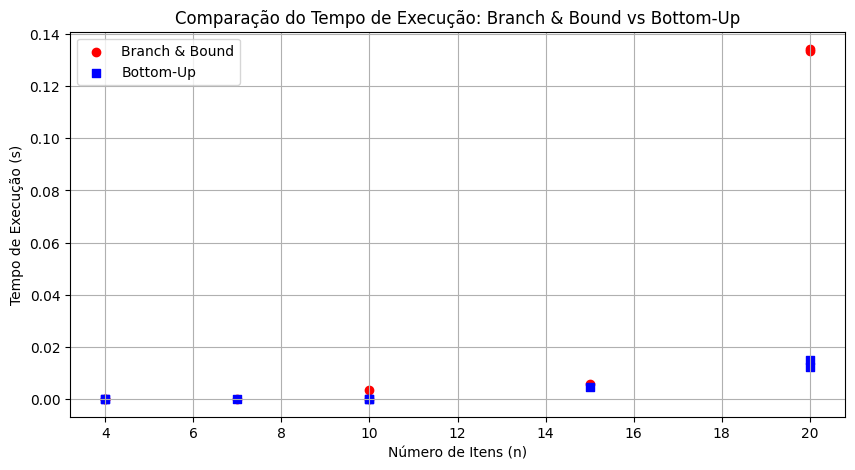

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(n_values, bb_times, marker='o', linestyle='-', color='r', label='Branch & Bound')
plt.scatter(n_values, bu_times, marker='s', linestyle='-', color='b', label='Bottom-Up')
plt.xlabel("Número de Itens (n)")
plt.ylabel("Tempo de Execução (s)")
plt.title("Comparação do Tempo de Execução: Branch & Bound vs Bottom-Up")
plt.legend()
plt.grid(True)
plt.show()

#### ADICIONAR QUEUE (caminho explorado de branches)


Explicação:

- Classe TreeNode: Representa um nó na árvore de Branch & Bound. Ele armazena o nível da árvore (índice do item a ser considerado), o valor acumulado (V), o peso acumulado (W), e a lista dos itens que foram selecionados até aquele ponto (taken).

- Classe KPBB: Representa o problema da mochila e contém:
    - Função initialSolution(): Implementa uma solução inicial gananciosa que tenta encher a mochila com os itens de maior relação valor/peso.
    - Função UpperBound(): Calcula o limite superior (Upper Bound) a partir do nó atual, considerando a inclusão de itens fracionados.
    - Função nodeEvaluation(): Avalia um nó, atualizando a melhor solução encontrada até o momento e calculando o upper bound.
    - Função solve(): Implementa o algoritmo Branch & Bound, explorando a árvore de soluções usando uma fila. Ela expande nós e mantém a melhor solução encontrada.

- Testando o algoritmo: O problema da mochila é resolvido com um exemplo simples onde a capacidade da mochila é 50, com 3 itens, cujos valores e pesos são fornecidos.

Ao final, o algoritmo imprime o melhor valor encontrado e os índices dos itens selecionados.

Este algoritmo de Branch & Bound permite que a solução seja encontrada de maneira eficiente, descartando ramos que não podem levar a uma solução melhor que a melhor solução encontrada até o momento.